# Tanimoto similarity against known inhibitors

25th Apr
This notebook is for checking the similarity between the FRESCO inhibitors and inhibitors from the literature.

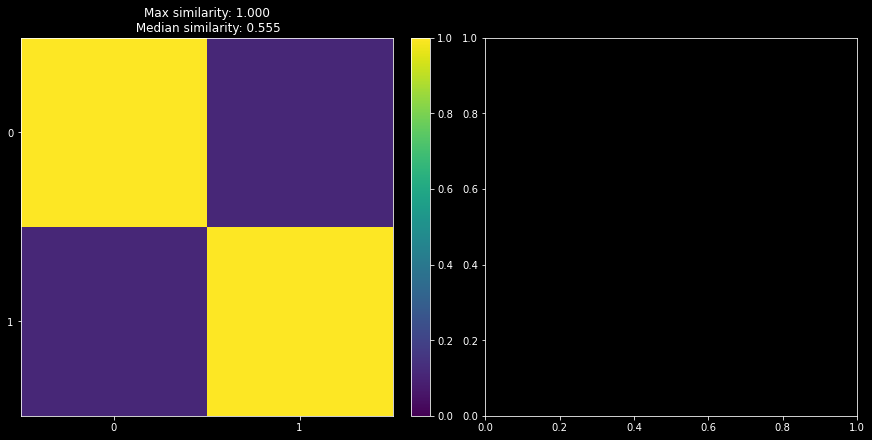

In [12]:
import numpy as np
from rdkit.Chem import MolFromSmiles, AllChem
import mols2grid
from rdkit import DataStructs

import matplotlib.pyplot as plt
import useful_rdkit_utils

fresco_mac1_inhibitor = 'CCC(CNC(CCC1CCCCC1)=O)NC2N=CN=C3N=CNC32'

# from https://www.biorxiv.org/content/10.1101/2022.02.27.482176v1.full.pdf
biorxiv_mac1_inhibitor = 'O=C(O)[C@H](CC1=CNC2=C1C=CC=C2)NC3=NC=NC4=C3C=CN4'

mac1_df = pd.DataFrame({'smiles': [fresco_mac1_inhibitor, biorxiv_mac1_inhibitor]})
useful_rdkit_utils.add_molecule_and_errors(
    mac1_df, smiles_col='smiles', mol_col_name='mol', error_col_name='Error')
mac1_df['fps'] = [useful_rdkit_utils.mol2morgan_fp(
    mol, radius=3, nBits=1024) for mol in mac1_df['mol']]

sim_mat = np.empty((len(mac1_df), len(mac1_df)))
for i in tqdm(range(len(mac1_df['fps']))):
    sim_mat[i] = np.array(
        DataStructs.BulkTanimotoSimilarity(mac1_df.loc[i, 'fps'], mac1_df['fps'].values))

fig, axs = plt.subplots(figsize=(12, 6), ncols=2, constrained_layout=True)
axs[0].set_title('Max similarity: {:.3f}\n Median similarity: {:.3f}'.format(
    np.amax(sim_mat),
    np.median(sim_mat)))
cax = axs[0].matshow(sim_mat, aspect="auto", vmin=0, vmax=1)
axs[0].xaxis.set_ticks_position('bottom')
fig.colorbar(cax, ax=axs[0])
plt.show()


In [13]:
mac1_df['similarity'] = sim_mat[0]

mols2grid.display(mac1_df, 
                  smiles_col='smiles', 
                  subset=['img', 'similarity'], 
                  tooltip=['smiles'],
                  transform = {'similarity': lambda x: '{:.3f}'.format(x)},
                  size=(240, 260),)
